In [1]:
import pandas as pd
import numpy as np

In [2]:
athlete_data=pd.read_csv("../Dataset/athlete_events.csv")
region_data=pd.read_csv("../Dataset/noc_regions.csv")

In [3]:
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athlete_data.shape

(271116, 15)

In [5]:
# Filtering for summer olympic events only.
athlete_data=athlete_data[athlete_data['Season']=='Summer']
athlete_data.shape

(222552, 15)

In [6]:
# Merging the noc_region csv dataframe with the main dataframe based on NOC column which is common to add region column.
athlete_data=athlete_data.merge(region_data, on='NOC', how='left')
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [7]:
athlete_data['region'].unique().shape

(206,)

In [8]:
# check for null values
athlete_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [9]:
athlete_data.duplicated().sum()

1385

In [10]:
# Dropping duplicates.
athlete_data.drop_duplicates(inplace=True)

In [11]:
athlete_data['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [12]:
# one hot encoding the medals column and merging it with the main dataframe.
data=pd.concat([athlete_data, pd.get_dummies(athlete_data['Medal'])], axis=1)

In [13]:
data.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_27020\1418318450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()


,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


##### After referring to the medal tally on google, I found out that the gold medal for USA are almost twice the number than the real number which is around thousand. On investigating, I found out that in the dataset for a team sport, if the team won a gold, all the players have been assigned a gold medal which should not be the case.

##### To correct this we will remove the duplicates based on team, NOC, Games, Year, City and medal.

In [14]:
# Corrected medal tally by removing duplicate rows for team sports.
medal_tally=data.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_tally=medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_27020\2340620977.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medal_tally=medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()


##### Now the medal tally stands corrected.

In [15]:
# Adding a column for total medals.
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [16]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze,total
53,IND,9,7,12,28


##### Medal tally for India is correct as checked on wikipedia.

In [17]:
years=data['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')

In [18]:
country=np.unique(data['region'].dropna().values).tolist()
country.sort()
country.insert(0, 'Overall')

In [19]:
medal_df=data.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [20]:
def fetch_medal_tally(data, year, country):
    medal_df=data.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df=medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]
    
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=True).reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    x['total']=x['Gold']+x['Silver']+x['Bronze']

    print(x)

In [21]:
fetch_medal_tally(data=data, year='Overall', country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_27020\4204365829.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=True).reset_index()


##### Overall Analysis
1. No. of editions of olympics.
2. No. of cities.
3. No. of events/sports.
4. No. of athletes.
5. Participating nations.

In [22]:
# No. of editions.
data['Year'].unique().shape[0]

29

In [23]:
# Cities where it was hosted.
data['City'].unique().shape[0]

23

In [24]:
# No. of events.
data['Event'].unique().shape[0]

651

In [25]:
# No. of sports played.
data['Sport'].unique().shape[0]

52

In [26]:
# No. of athletes.
data['Name'].unique().shape[0]

116122

In [27]:
# Participating nations.
data['region'].unique().shape[0]

206

In [28]:
nations_over_time=data.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time.rename(columns={'index':'Edition', 'Year': 'Number of Countries'}, inplace=True)

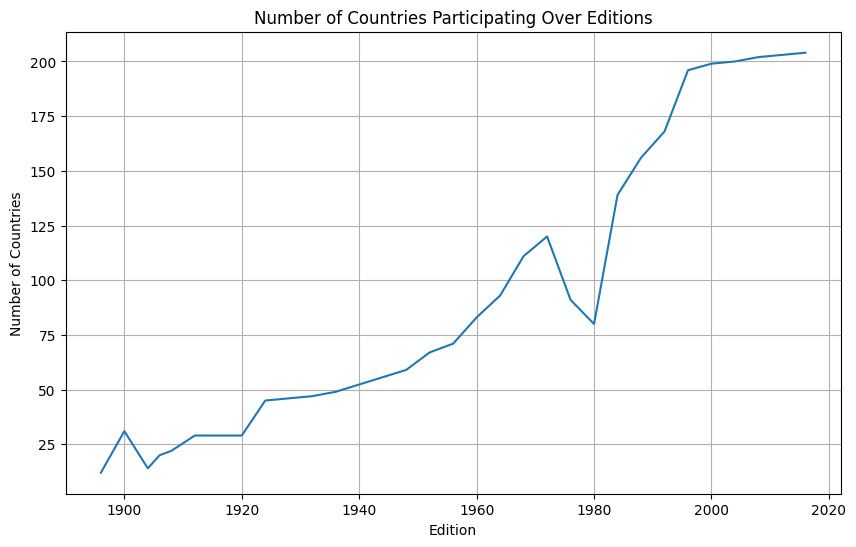

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(nations_over_time["Edition"], nations_over_time["Number of Countries"])
plt.xlabel("Edition")
plt.ylabel("Number of Countries")
plt.title("Number of Countries Participating Over Editions")
plt.grid(True)
plt.show()

In [30]:
sports_played_eachtime=data.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')
sports_played_eachtime.rename(columns={'index':'Edition', 'Year': 'Event'}, inplace=True)

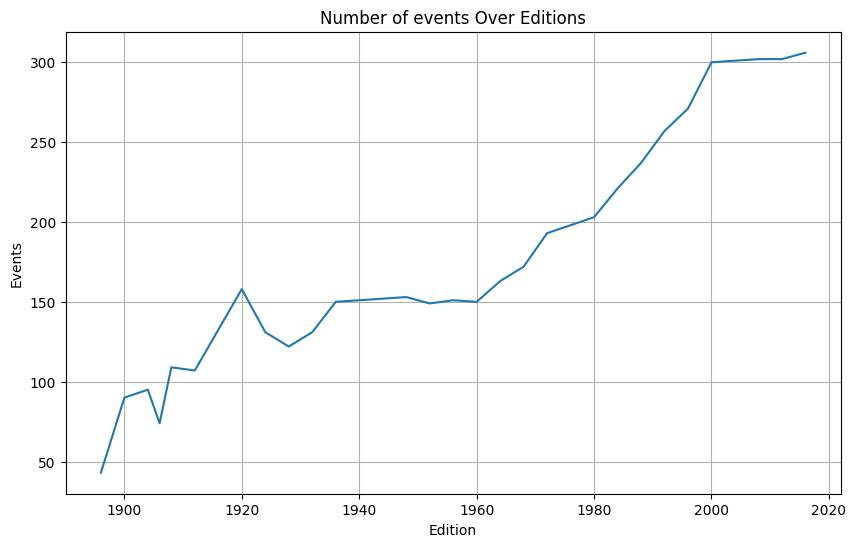

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(sports_played_eachtime["Edition"], sports_played_eachtime["Event"])
plt.xlabel("Edition")
plt.ylabel("Events")
plt.title("Number of events Over Editions")
plt.grid(True)
plt.show()

In [32]:
athletes_played_eachtime=data.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('index')
athletes_played_eachtime.rename(columns={'index':'Edition', 'Year': 'Name'}, inplace=True)

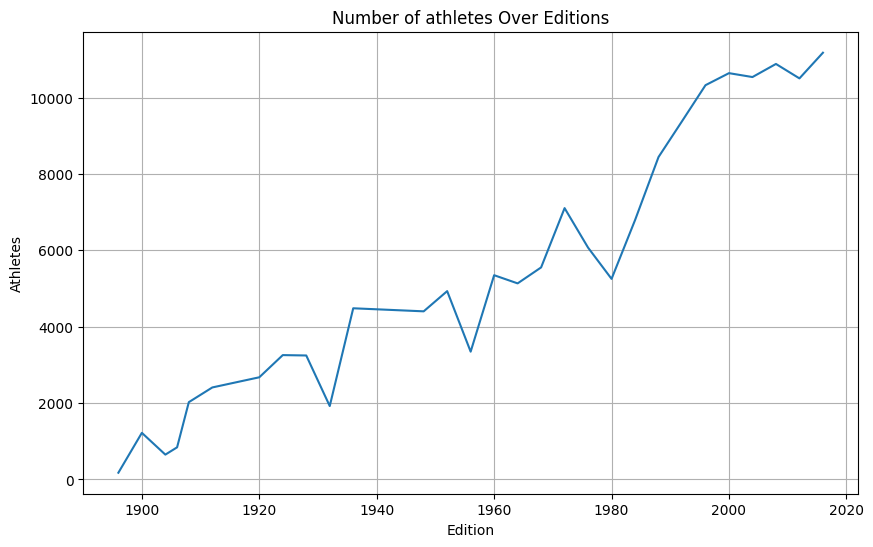

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(athletes_played_eachtime["Edition"], athletes_played_eachtime["Name"])
plt.xlabel("Edition")
plt.ylabel("Athletes")
plt.title("Number of athletes Over Editions")
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='Year', ylabel='Sport'>

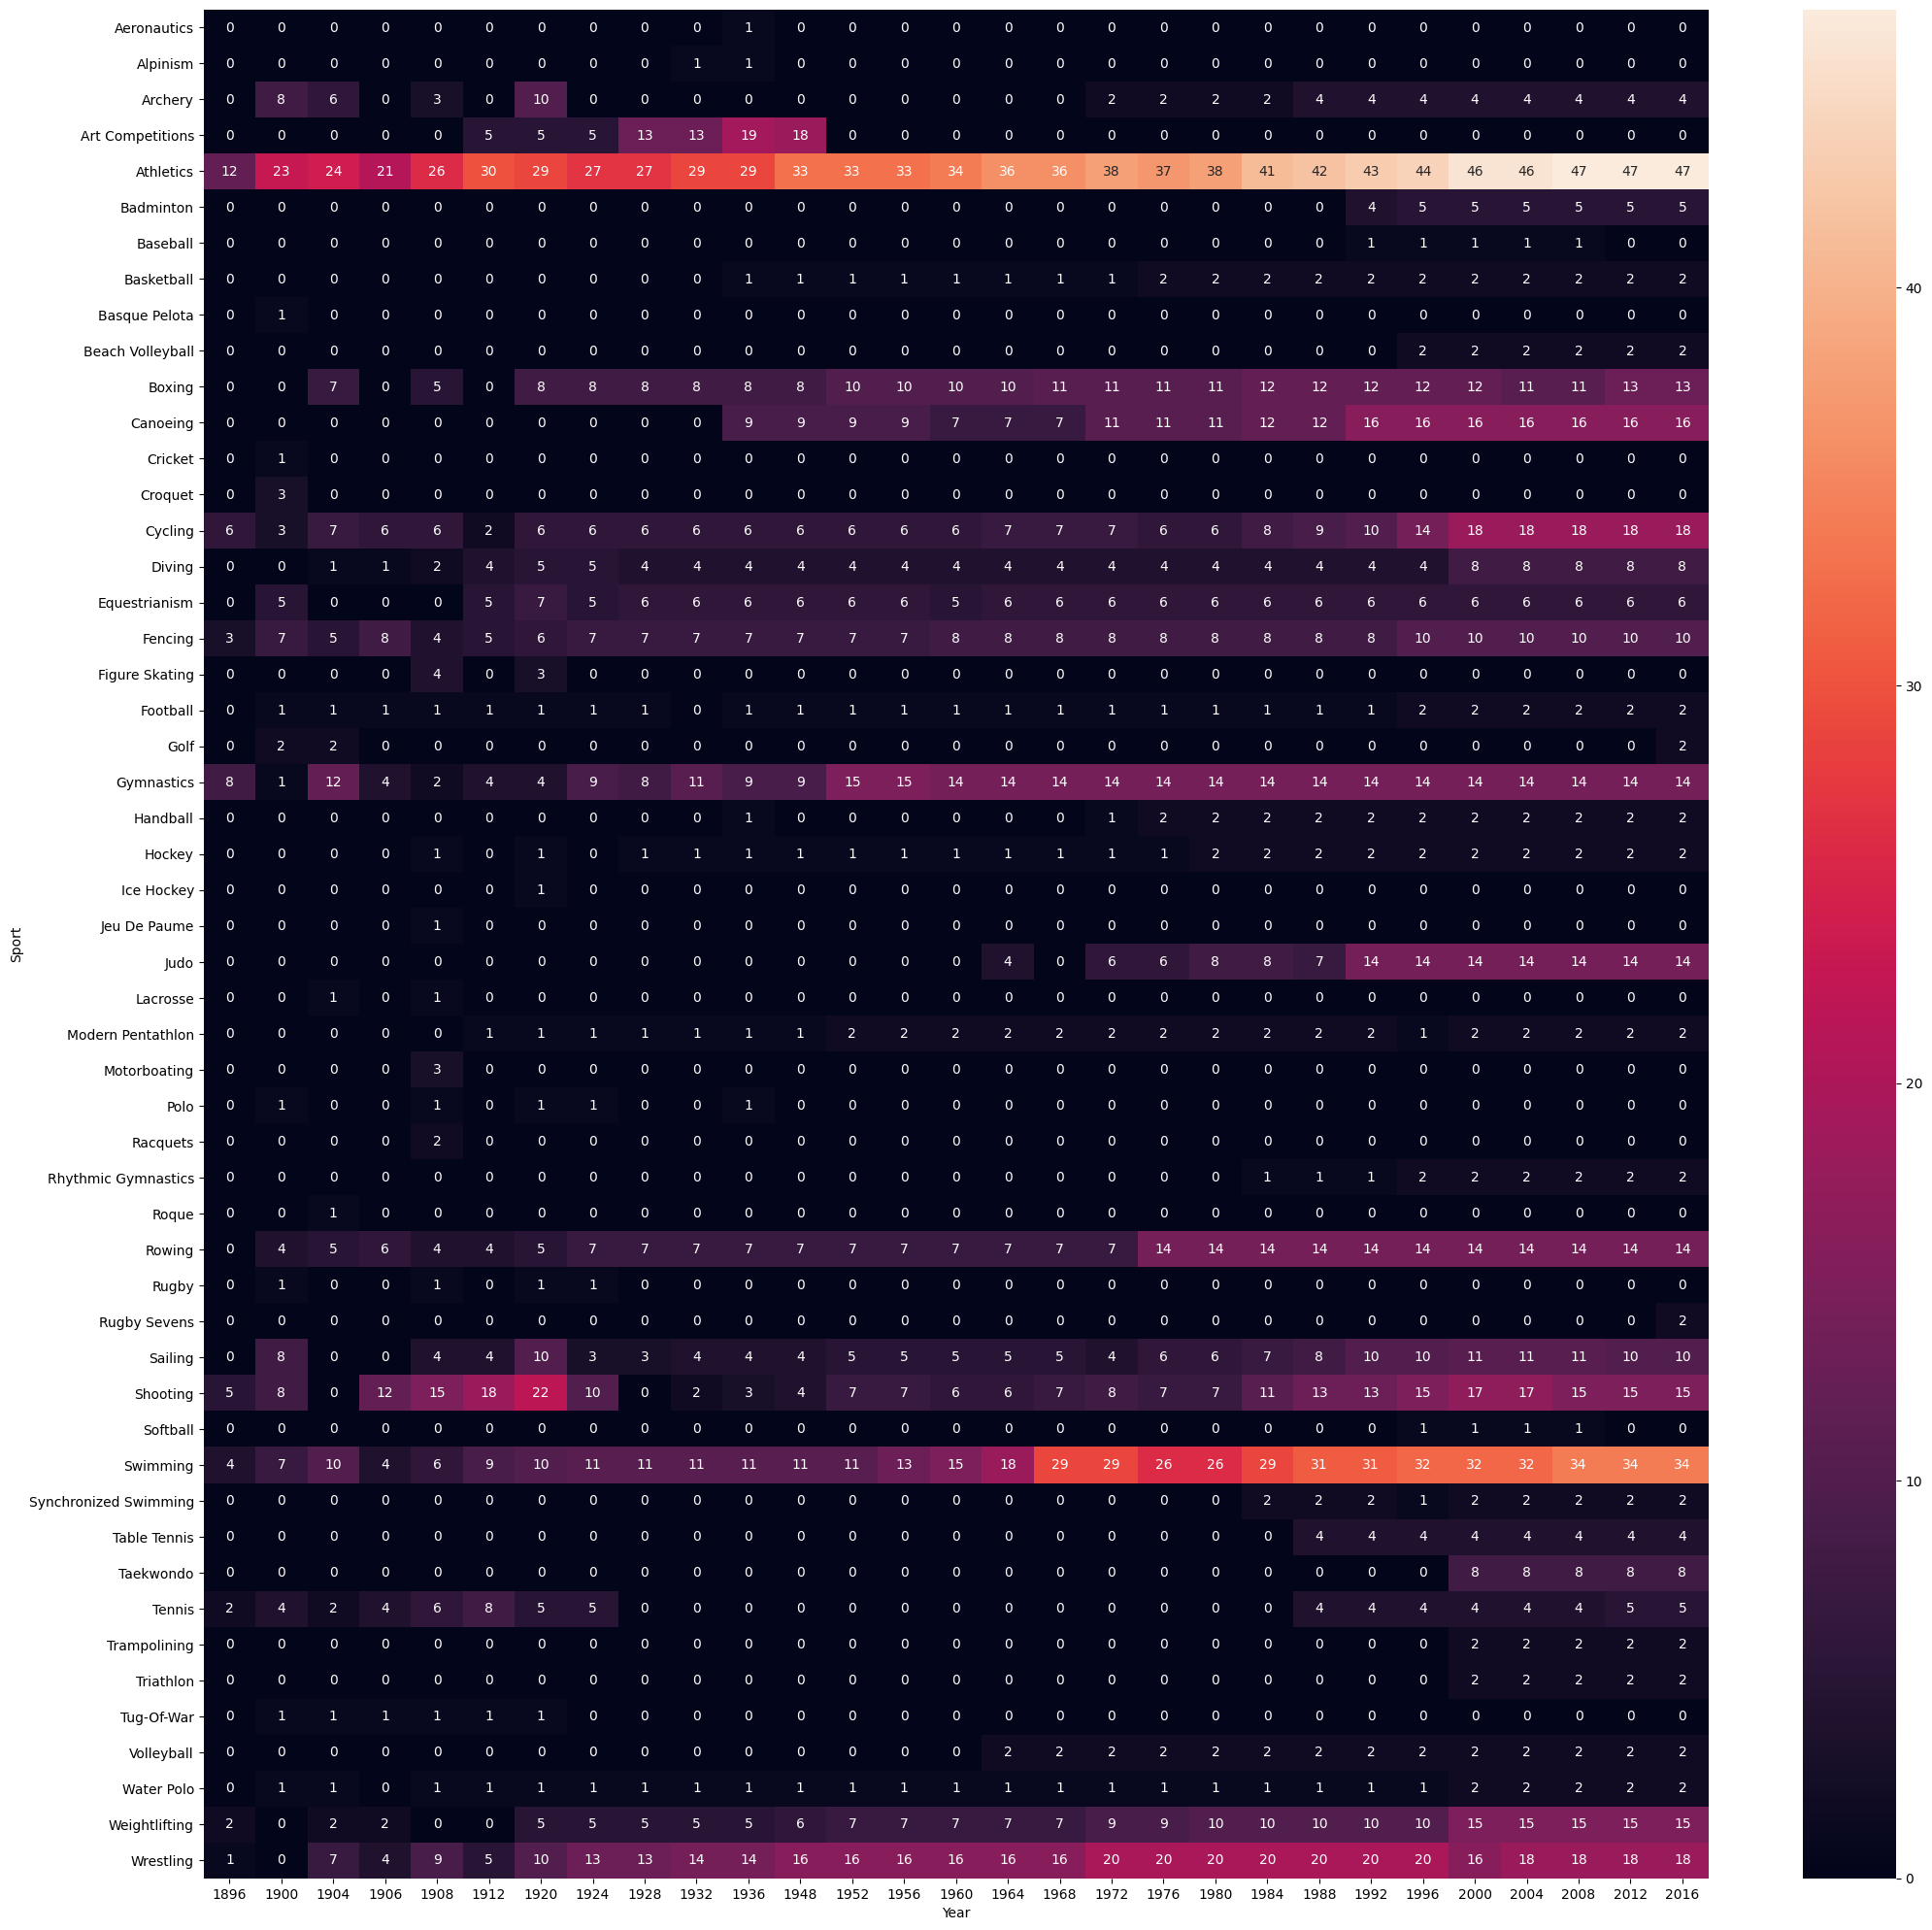

In [34]:
import seaborn as sns

x=data.drop_duplicates(['Year', 'Sport', 'Event'])

plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)

In [35]:
def most_successful_ath(data, sport):
    temp_df=data.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df=temp_df[temp_df['Sport']==sport]

    x=temp_df['Name'].value_counts().reset_index().head(15).merge(data, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)

    return x

In [36]:
most_successful_ath(data, 'Wrestling')

,Name,Medals,Sport,region
0,Wilfried Dietrich,5,Wrestling,Germany
8,Kaori Icho,4,Wrestling,Japan
12,Eino Aukusti Leino,4,Wrestling,Finland
16,Johan Rudolf Svensson,4,Wrestling,Sweden
20,Bruce Robert Baumgartner,4,Wrestling,USA
24,Imre Polyk,4,Wrestling,Hungary
28,Sren Marinus Jensen,4,Wrestling,Denmark
32,Saori Yoshida,4,Wrestling,Japan
36,Artur Borisovich Taymazov,4,Wrestling,Uzbekistan
40,Aleksandr Aleksandrovich Karelin,4,Wrestling,Russia


##### Country Wise Analysis
1. Country wise medal tally per year (line plot)
2. What countries are good
3. Most successful athletes (top 10)

### 1. Country wise medal tally per year (line plot)

In [37]:
temp_df=data.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_27020\770091732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)


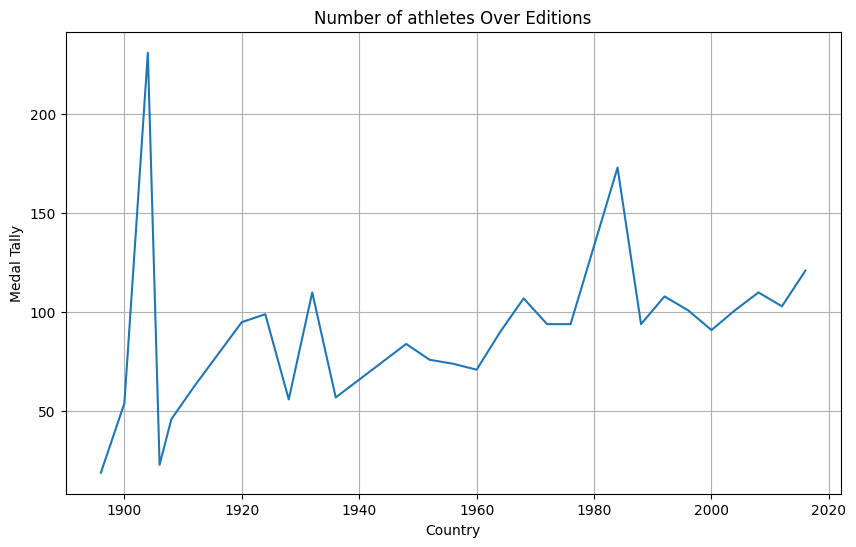

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(final_df["Year"], final_df["Medal"])
plt.xlabel("Country")
plt.ylabel("Medal Tally")
plt.title("Number of athletes Over Editions")
plt.grid(True)
plt.show()

### 2. What countries are good at which sports

<AxesSubplot: xlabel='Year', ylabel='Sport'>

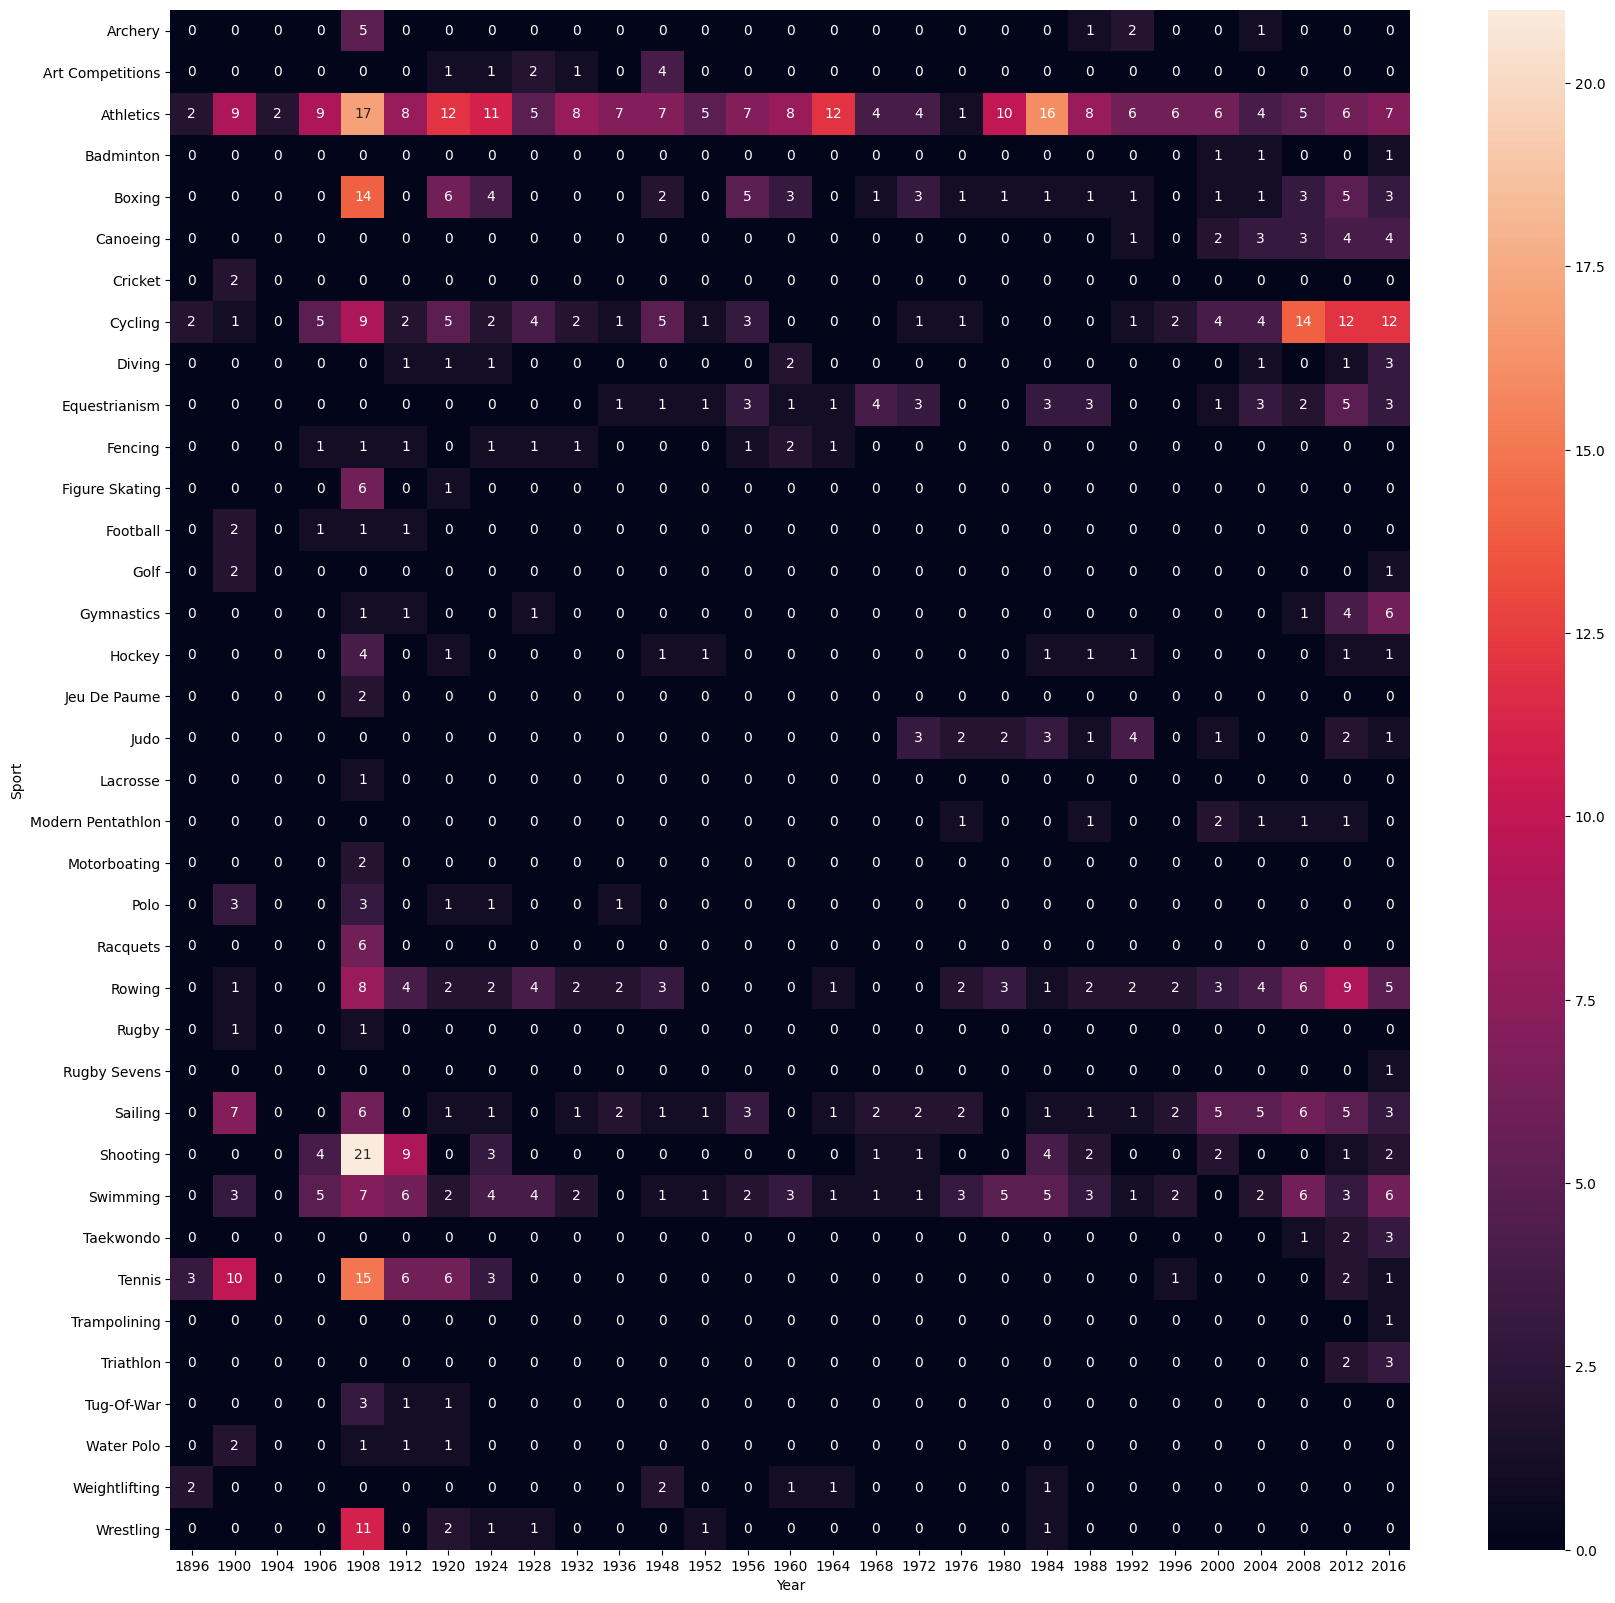

In [39]:
new_df=temp_df[temp_df['region']=='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype('int'), annot=True)

### 3. Most successful athletes (top 10)

In [40]:
def most_successful(data, country):
    temp_df=data.dropna(subset=['Medal'])

    temp_df=temp_df[temp_df['region']==country]

    x=temp_df['Name'].value_counts().reset_index().head(15).merge(data, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)

    return x

In [41]:
most_successful(data, 'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics


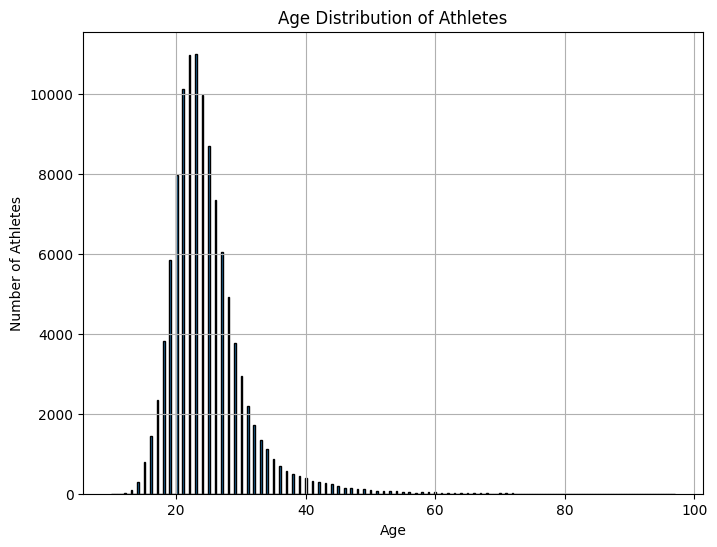

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

athlete_df = data.drop_duplicates(subset=['Name', 'region'])

# Filter for non-null age values
filtered_age = athlete_df['Age'].dropna()

# Create the distribution plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed 
plt.hist(filtered_age, bins='auto', edgecolor='black')  # Create the histogram
plt.xlabel('Age')  # Label the x-axis
plt.ylabel('Number of Athletes')  # Label the y-axis
plt.title('Age Distribution of Athletes')
plt.grid(True)  # Add grid lines for better readability
plt.show()  # Display the plot